# AI4GSD Demo for grain size extraction
------------------------------------------
## Smartphone video
------------------------------------------
#### Table of contents
#### 0. Installing requried packages (please restart the kernel after installation)
#### 1. Import required packages
#### 2. Define working directory
#### 3. Extracting or copying your videos/photos to desired folder
#### 4. Obtaining scales from AI for validation purpuse
#### 5. Obtaining segmentation of anthropogenic objects
#### 6. Obtaining grain size data

### 0. Installing requried packages (please restart the kernel after installation)

In [1]:
#!pip install --user natsort
#!pip install --user ismember

In [2]:
### 1. Import required packages

In [3]:
import os, sys
sys.path.append(os.path.dirname(os.getcwd()))
import AI4GSD

In [4]:
### 2. Define working directory

In [5]:
WorkDir = os.path.dirname(os.getcwd())
foldername = '20250517_YC_WalkingVideoPhotoParkTest'                       # Parent folder where you save photos/videos.
PhotoDir = WorkDir + os.sep + 'Demo_Data' + os.sep + foldername            

In [6]:
### 3. Extracting or copying your videos/photos to desired folder

In [7]:
AI4GSD.getPhotos(PhotoDir,nframe=2000, overwrite=True)                   # Use once.

Corrected orientation for: IMG_9581.JPG
Corrected orientation for: IMG_9582.JPG
Corrected orientation for: IMG_9583.JPG
Corrected orientation for: IMG_9584.JPG
Corrected orientation for: IMG_9585.JPG



In [8]:
### 4. Obtaining scales from AI for validation purpuse

In [9]:
PP = AI4GSD.parameters()
PP.Directory = PhotoDir
PP.OverWriteAll = True                                                    # Overwrite everything if True.
PP.Directory = PhotoDir
PP.OverWriteScaleFile = False
PP.OverWriteScaleRows = True
PP.ScaleSource = 'AI'                                                      # Use AI option.
PP.ModelName = 'YOLO11m.1280.20250825'                                     # Which AI to use.
PP.ComputingSource = 'local'                                               # What computing resource to use.
PP.ImageSizeFactor = 1                                                     # Do you need to user a larger image size for inference?
PP.ConfidenceThreshold = 0.85                                              # Minimum confidence threshold.
PP.YOLOSave = True                                                         # Need to save AI prediction to folder.
scales =  AI4GSD.metadata(PP)

Generating scale file for: 20250517_YC_WalkingVideoPhotoParkTest
Estimating photo resolution via local AI model: YOLO11m.1280.20250825
Model layer: 113, model parmeter: 20.06M, submodule number: 409


/home/chen200/Computation/Anaconda/anaconda3/envs/sfa/lib/python3.11/site-packages/torch/cuda/__init__.py:182: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11040). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at /pytorch/c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


1/5: photo 1/5, IMG_9581.JPG, scale greencap, res 0.21 mm/px, status 200, (20.00%), 1.73 s
2/5: photo 2/5, IMG_9582.JPG, scale greencap, res 0.49 mm/px, status 200, (40.00%), 0.70 s
3/5: photo 3/5, IMG_9583.JPG, scale greencap, res 0.05 mm/px, status 200, (60.00%), 0.69 s
4/5: photo 4/5, IMG_9584.JPG, scale greencap, res 0.25 mm/px, status 200, (80.00%), 0.69 s
5/5: photo 5/5, IMG_9585.JPG, scale greencap, res 0.46 mm/px, status 200, (100.00%), 0.70 s
Total time: 6.04 s, time per photo 1.21 s
-----------------------------------------------------------------



In [10]:
### 5. Obtaining segmentation of anthropogenic objects

In [11]:
PP = AI4GSD.parameters()
PP.Directory = PhotoDir
PP.FolderLevel = 'L1'
PP.ModelName = 'YOLO11m.640.20250906'
PP.ObjectName = 'anthro'
PP.OverWriteSegementation = True
PP.YOLOSave = False
PP.YOLOIOU = 0.45
PP.ComputingSource = 'local'
PP.ImageSizeType = 'default'
PP.ImageSizeFactor=1
PP.SegmentationClassName = ['board','redbag','people']                     # What object class need to track.
AI4GSD.background(PP)

-----------------------------------------------------------------
Folder name: 20250517_YC_WalkingVideoPhotoParkTest
output name: segments
Model name: YOLO11m.640.20250906 from local for anthro
Model layer: 125, model parmeter: 22.37M, submodule number: 445
IOU: 0.45, user confidence: 0.35
Number of photos: 5, number of exluded photos 0
20250517_YC_WalkingVideoPhotoParkTest: 1/5: IMG_9581.JPG (20.00%)
20250517_YC_WalkingVideoPhotoParkTest: 2/5: IMG_9582.JPG (40.00%)
20250517_YC_WalkingVideoPhotoParkTest: 3/5, IMG_9583.JPG, no objects (60.00%)
20250517_YC_WalkingVideoPhotoParkTest: 4/5: IMG_9584.JPG (80.00%)
20250517_YC_WalkingVideoPhotoParkTest: 5/5: IMG_9585.JPG (100.00%)
Total time: 2.54 s, time per photo 0.51 s
-----------------------------------------------------------------



In [12]:
### 6. Obtaining grain size data

AI4GSD: an AI and cloud powered tool for grain size quantification
AI models in use: YOLO11m.1280.20250322
Confidence thresholds in use: 0.35

-----------------------------------------------------------------
Folder name: 20250517_YC_WalkingVideoPhotoParkTest
Output folder: 20250517_YC_WalkingVideoPhotoParkTest_YOLO11m.1280.20250322_35
Model name: YOLO11m.1280.20250322 from local for rock detection
Model layer: 113, model parmeter: 20.05M, submodule number: 409
IOU: 0.45, YOLO confidence: 0.25, user confidence: 0.35
Number of photos: 5, number of exluded photos 0
1/5: IMG_9581.JPG, resolution 0.21 mm/px (20.00%), 0.00 s
Detected 3753 rocks, diagonal and count based D10, D50, D60, and D84 are: 0.98, 1.53, 1.67, and 2.20 cm
Detected 3753 rocks, diagonal and area  based D10, D50, D60, and D84 are: 1.25, 2.01, 2.20, and 2.89 cm


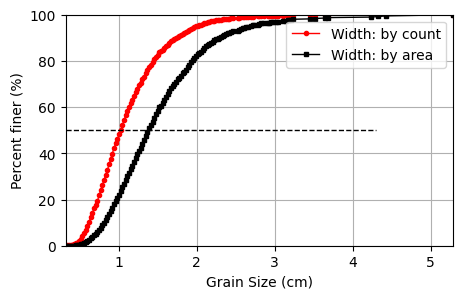

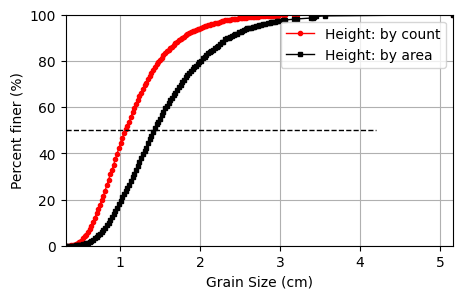

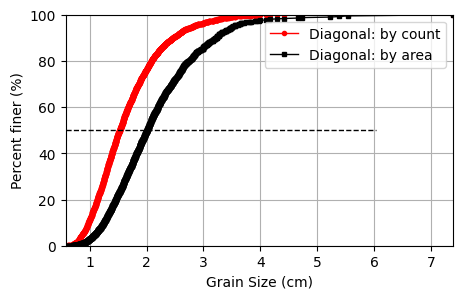

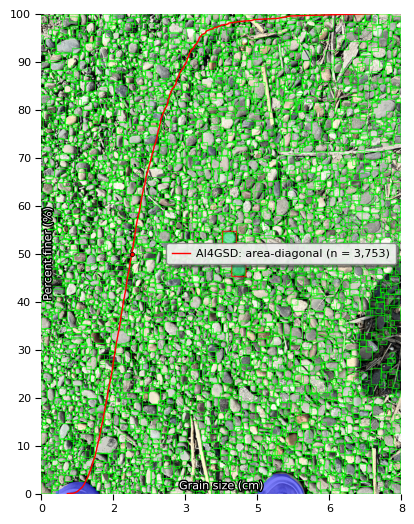

2/5: IMG_9582.JPG, resolution 0.49 mm/px (40.00%), 4.65 s
Detected 5387 rocks, diagonal and count based D10, D50, D60, and D84 are: 1.63, 2.21, 2.37, and 2.90 cm
Detected 5387 rocks, diagonal and area  based D10, D50, D60, and D84 are: 1.82, 2.56, 2.75, and 3.43 cm


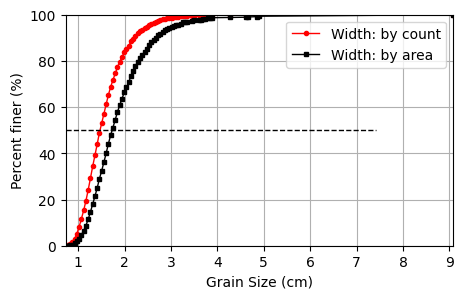

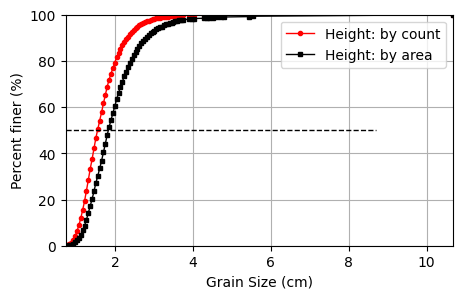

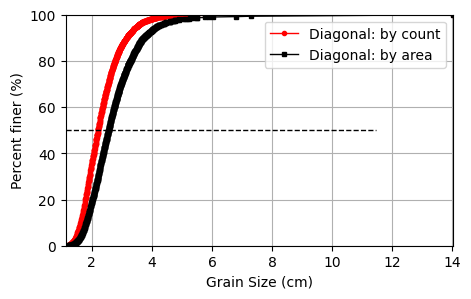

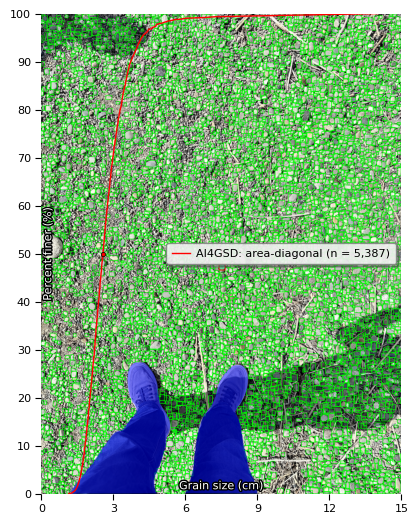

3/5: IMG_9583.JPG, resolution 0.05 mm/px (60.00%), 4.43 s
Detected 450 rocks, diagonal and count based D10, D50, D60, and D84 are: 0.56, 1.13, 1.25, and 1.63 cm
Detected 450 rocks, diagonal and area  based D10, D50, D60, and D84 are: 0.94, 1.57, 1.73, and 2.48 cm


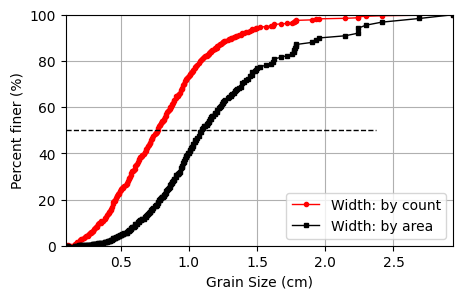

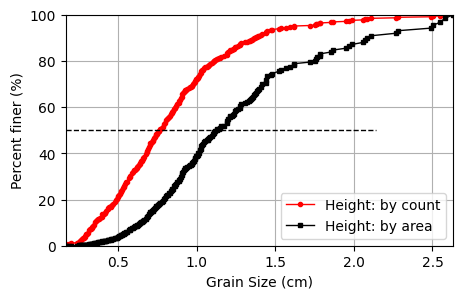

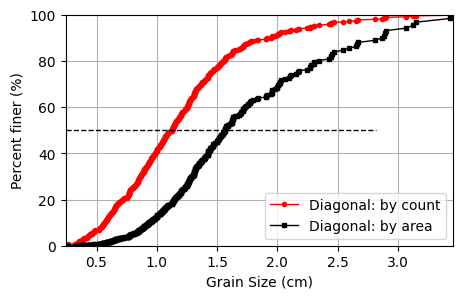

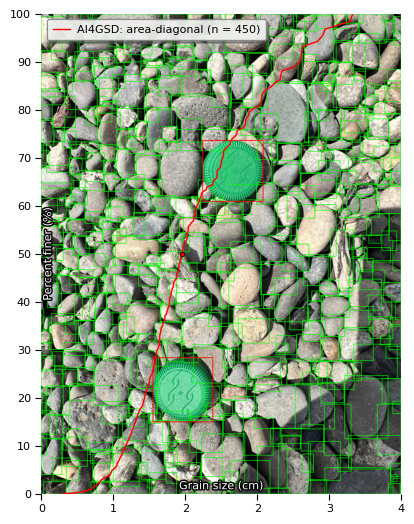

4/5: IMG_9584.JPG, resolution 0.25 mm/px (80.00%), 3.65 s
Detected 4159 rocks, diagonal and count based D10, D50, D60, and D84 are: 1.03, 1.54, 1.67, and 2.18 cm
Detected 4159 rocks, diagonal and area  based D10, D50, D60, and D84 are: 1.27, 1.96, 2.16, and 2.89 cm


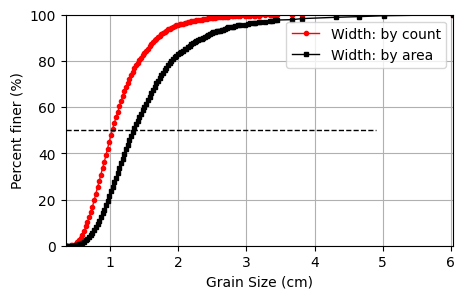

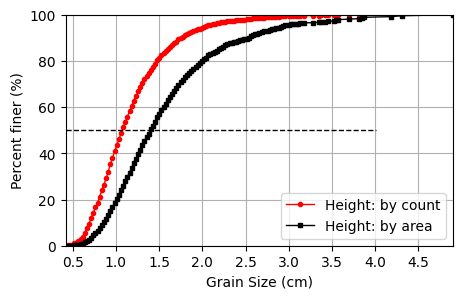

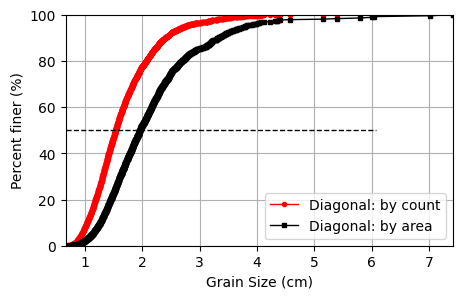

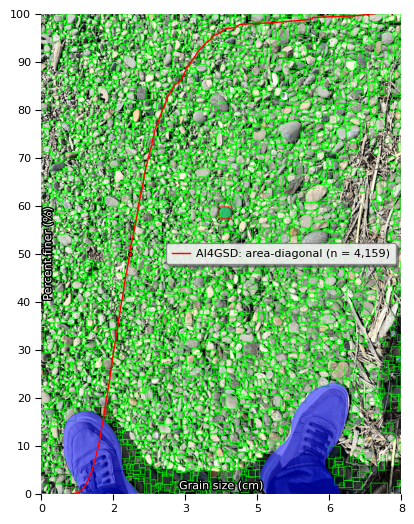

5/5: IMG_9585.JPG, resolution 0.46 mm/px (100.00%), 4.43 s
Detected 5390 rocks, diagonal and count based D10, D50, D60, and D84 are: 1.57, 2.14, 2.29, and 2.83 cm
Detected 5390 rocks, diagonal and area  based D10, D50, D60, and D84 are: 1.77, 2.53, 2.75, and 3.62 cm


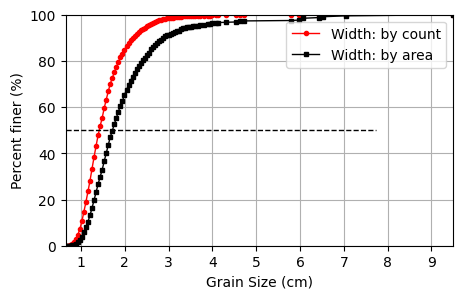

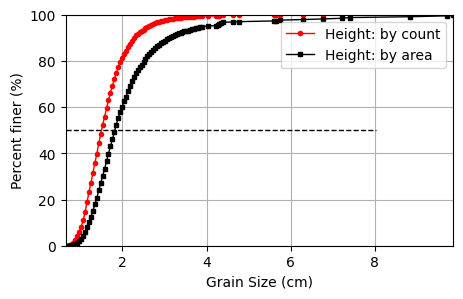

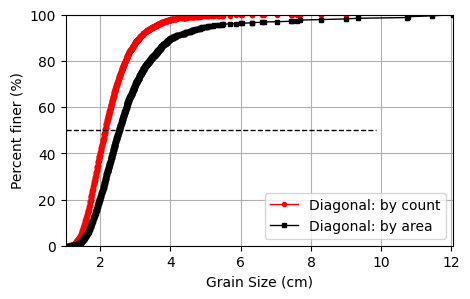

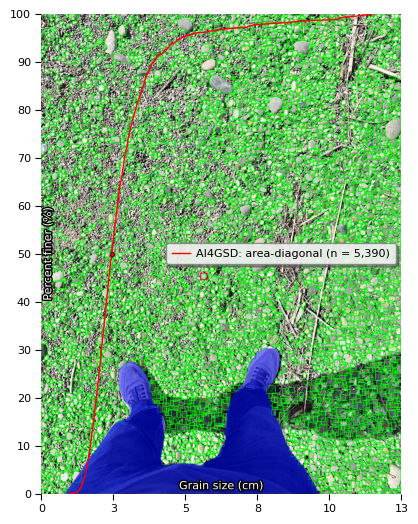

Output folder summary data to: /home/chen200/Computation/Python/work/Mine/SFA/AI4GSD/Demo_Data/20250517_YC_WalkingVideoPhotoParkTest/grains_predicts/20250517_YC_WalkingVideoPhotoParkTest_YOLO11m.1280.20250322_35/Statistics_V3_20250517_YC_WalkingVideoPhotoParkTest_YOLO11m.1280.20250322_35.csv
Total number of grains: 19139, number of grains per photo: 3827.80
Total time: 21.94 s, time per photo 4.39 s

Output all summary data to: /home/chen200/Computation/Python/work/Mine/SFA/AI4GSD/Demo_Data/20250517_YC_WalkingVideoPhotoParkTest/Statistics_V3_20250517_YC_WalkingVideoPhotoParkTest_YOLO11m.1280.20250322_35.csv
Total execution time: 21.94 s


In [14]:
PP = AI4GSD.parameters()
PP.Directory = PhotoDir
PP.ModelName = 'YOLO11m.1280.20250322'

PP.YOLOSave = False
PP.SaveOverlayLabel = False
PP.OverWriteAll = True                                                  
PP.PrintOnScreen = True 
PP.OverlayFontSize = 4
PP.OverlayLegendFontSize = 4
PP.OverlayGSDTickLineWidth = 4
gsd = AI4GSD.Photo2GSD(PP)